# **Waste Material Segregation for Improving Waste Management**
### Author : Shriyan Arcot

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [4]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1
!pip install tensorflow==2.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 3.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 4.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.6/342.6 kB 4.7 MB/s eta 0:00:00a 0:00:01


In [5]:
!pip install keras==3.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.9.2
    Uninstalling keras-3.9.2:
      Successfully uninstalled keras-3.9.2


In [30]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import zipfile
import os
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Load the dataset.

In [27]:
# Load and unzip the dataset

with zipfile.ZipFile("data.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

In [28]:
# Ganther the contents information
categories = os.listdir("data")
print("Classes found:", categories)
totalImages=0
for category in categories:
    folder_path = os.path.join("data", category)
    if os.path.isdir(folder_path):
        imageSize = len(os.listdir(folder_path))
        totalImages += imageSize
        print(f"{category}: {imageSize} files")
        
print(f"Total Images: {totalImages} files")

Classes found: ['Paper', 'Food_Waste', 'Metal', 'Cardboard', 'Other', 'Glass', 'Plastic']
Paper: 1030 files
Food_Waste: 1000 files
Metal: 1000 files
Cardboard: 540 files
Other: 1010 files
Glass: 750 files
Plastic: 2295 files
Total Images: 7625 files


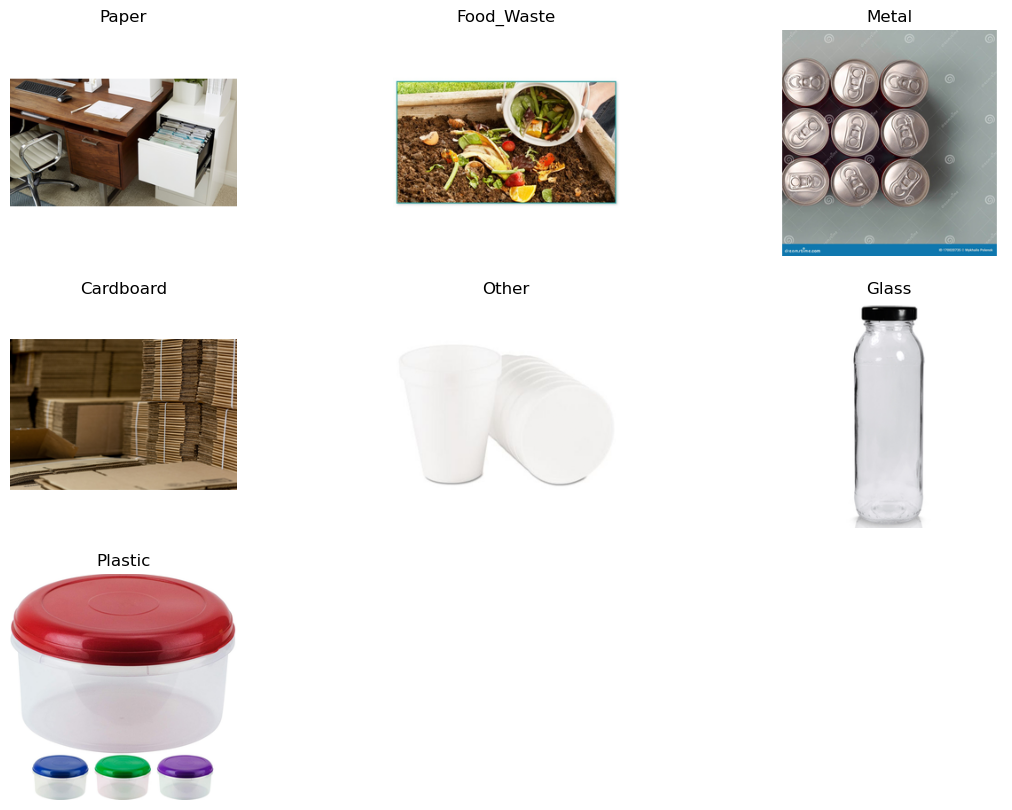

In [31]:
data = 'data'

# fetch all th 7 categories
categories = [catg for catg in os.listdir(data) if os.path.isdir(os.path.join(data, catg))]

plt.figure(figsize=(14, 10))

for i, category in enumerate(categories):
    category_path = os.path.join(data, category)
    
    images = os.listdir(category_path) 
    sample_image = images[100]
    sample_image_path = os.path.join(category_path, sample_image)
    
    img = mpimg.imread(sample_image_path)
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(category)
    
plt.show()

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [32]:
# Create a function to load the raw images
def load_images(folder_path, label, target_size=(128, 128)):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        
        try:
            # Open, convert to RGB, resize
            img = PIL.Image.open(img_path).convert('RGB')
            img = img.resize(target_size)

            img_array = np.array(img)
            images.append(img_array)
            labels.append(label)

        except Exception as e:
            print(f"Error loading image: {img_path} — {e}")
            continue

    return images, labels


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [33]:
# Get the images and their labels

data = 'data'

# fetch all th 7 categories
categories = [catg for catg in os.listdir(data) if os.path.isdir(os.path.join(data, catg))]

# For verification purposes
print("categories:", categories)

# Initialize containers
all_images = []
all_labels = []

# Load images and their corresponding labels
for label, category in enumerate(categories):
    folder = os.path.join(data, category)
    print(f"Loading category '{category}' with label {label}")
    
    images, labels = load_images(folder, label)  
    all_images.extend(images)
    all_labels.extend(labels)

# Convert to numpy arrays
X = np.array(all_images)
y = np.array(all_labels)

print(f"\nLoaded {X.shape[0]} images.")
print(f"Image shape: {X.shape[1:]}")
print(f"Labels shape: {y.shape}")

categories: ['Paper', 'Food_Waste', 'Metal', 'Cardboard', 'Other', 'Glass', 'Plastic']
Loading category 'Paper' with label 0
Loading category 'Food_Waste' with label 1
Loading category 'Metal' with label 2
Loading category 'Cardboard' with label 3
Loading category 'Other' with label 4
Loading category 'Glass' with label 5
Loading category 'Plastic' with label 6

Loaded 7625 images.
Image shape: (128, 128, 3)
Labels shape: (7625,)


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

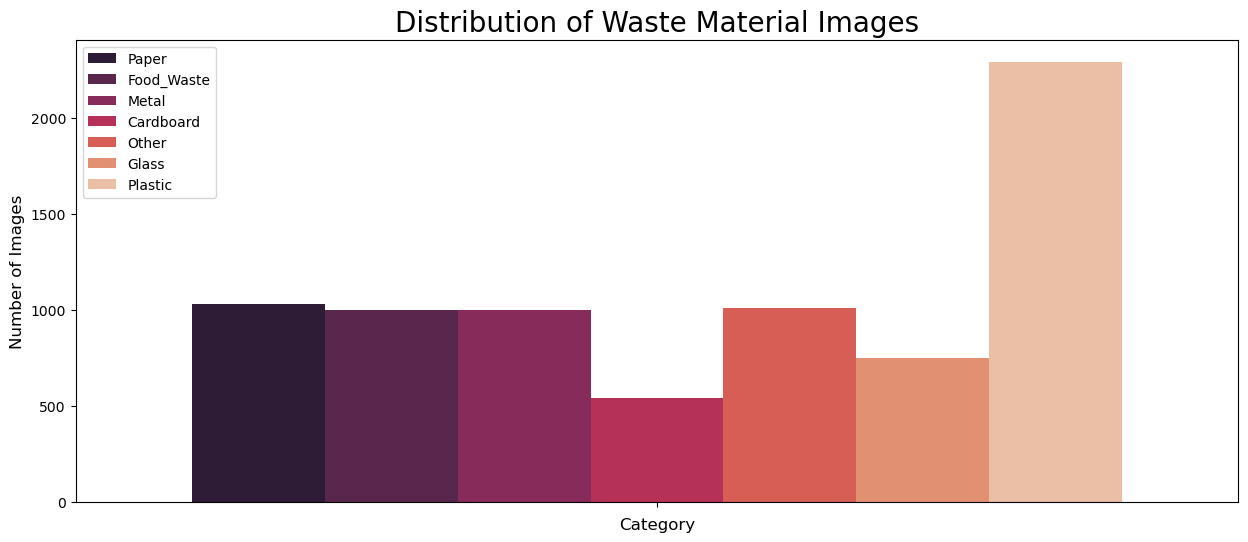

In [34]:
# Visualise Data Distribution


# Count how many images per class
class_counts = [np.sum(y == i) for i in range(len(categories))]

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(y=class_counts,hue=categories ,palette="rocket")
plt.title("Distribution of Waste Material Images", fontsize=20)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

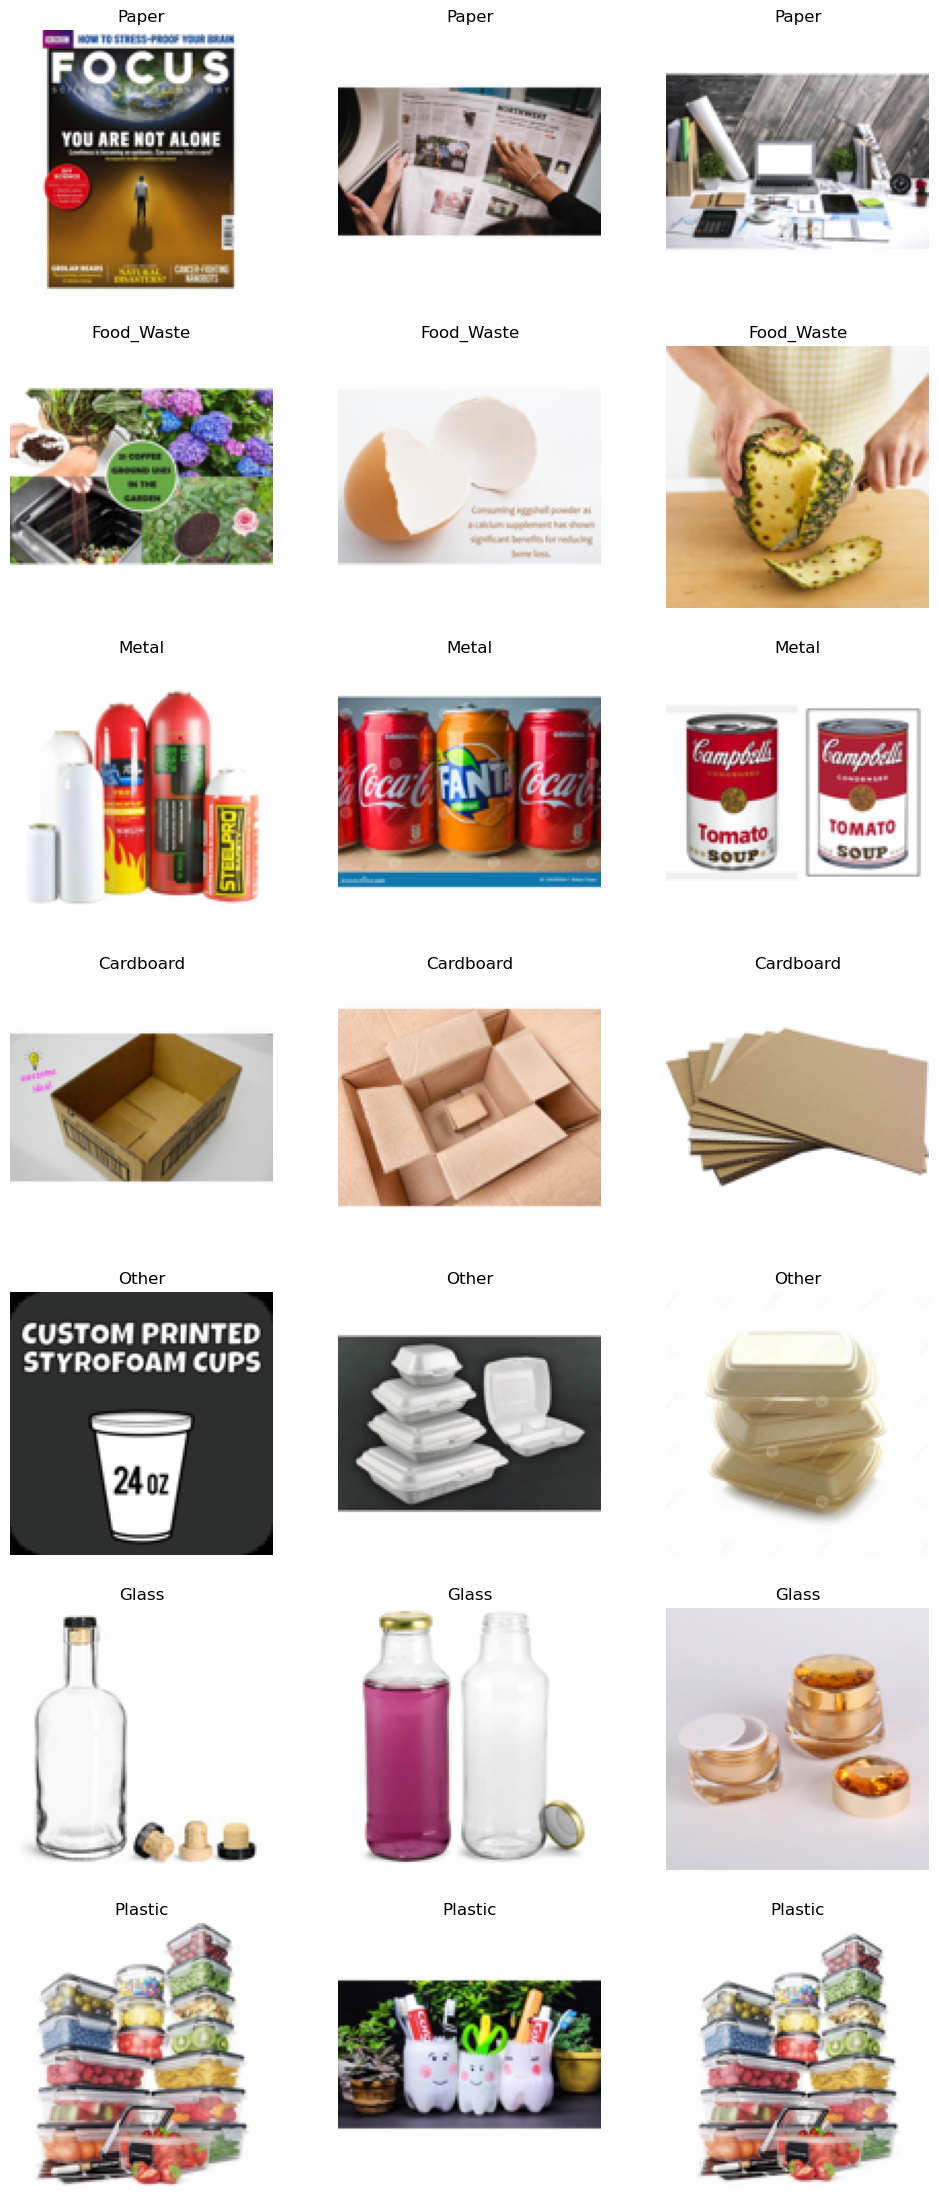

In [37]:
# Visualise Sample Images (across different labels)

samples_per_class = 3
num_classes = len(categories)

plt.figure(figsize=(samples_per_class*4, num_classes*4))

for class_index, class_name in enumerate(categories):
    # Get all indices where y == class_index
    class_indices = np.where(y == class_index)[0]
    
    # Randomly pick sample images from this class
    selected_indices = random.sample(list(class_indices), min(samples_per_class, len(class_indices)))
    
    for i, idx in enumerate(selected_indices):
        plt.subplot(num_classes, samples_per_class, class_index * samples_per_class + i + 1)
        plt.imshow(X[idx])
        plt.title(class_name)
        plt.axis('off')

plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [38]:
# Find the smallest and largest image dimensions from the data set


min_width, min_height = float('inf'), float('inf')
max_width, max_height = 0, 0

# Scan all images to find min/max dimensions
for category in categories:
    category_path = os.path.join(data, category)
    for image_file in os.listdir(category_path):
        image_path = os.path.join(category_path, image_file)
        try:
            with PIL.Image.open(image_path) as img:
                width, height = img.size
                min_width = min(min_width, width)
                min_height = min(min_height, height)
                max_width = max(max_width, width)
                max_height = max(max_height, height)
        except:
            print("Error!!")

print(f"Smallest image dimensions: {min_width}x{min_height}")
print(f"Largest image dimensions: {max_width}x{max_height}")

Smallest image dimensions: 256x256
Largest image dimensions: 256x256


In [39]:
# Resize the image dimensions
target_size = (min_width, min_height)

all_images = []
all_labels = []

for label, category in enumerate(categories):
    folder_path = os.path.join(data, category)
    images, labels = load_images(folder_path, label, target_size=target_size)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert to NumPy arrays
X = np.array(all_images)
y = np.array(all_labels)

print(f"Resized and loaded {X.shape[0]} images to shape {X.shape[1:]}")

Resized and loaded 7625 images to shape (256, 256, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [40]:
# Encode the labels suitably

# Print original label shape
print(f"Before encoding: y shape = {y.shape},\n sample = {random.sample(list(y),5)}")

# One-hot encode the labels
y_encoded = tf.keras.utils.to_categorical(y, num_classes=len(categories))

# Print encoded label shape
print(f"After encoding: y_encoded shape = {y_encoded.shape}, \nsample =\n{random.sample(list(y_encoded),5)}")

Before encoding: y shape = (7625,),
 sample = [6, 2, 2, 6, 2]
After encoding: y_encoded shape = (7625, 7), 
sample =
[array([0., 1., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.])]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [41]:
# Assign specified parts of the dataset to train and validation sets

# Using 80% for training, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded,            
    test_size=0.2,             
    stratify=y,              
    random_state=18          
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"y_val shape:   {y_val.shape}")

X_train shape: (6100, 256, 256, 3)
y_train shape: (6100, 7)
X_val shape:   (1525, 256, 256, 3)
y_val shape:   (1525, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [42]:
# Build and compile the model

image_shape = X_train.shape[1:]  
num_classes = y_train.shape[1]   

# Build the model
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of model
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,619,399 (112.99 MB)

 Trainable params: 29,618,951 (112.99 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [44]:
# Training

stopEarly = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

bestModel = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

reduceLR = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1
)

processedModel = model.fit(
    X_train / 255.0, y_train,
    validation_data=(X_val / 255.0, y_val),
    epochs=25,
    batch_size=50,
    callbacks=[stopEarly, bestModel, reduceLR],
    verbose=1
)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2414 - loss: 8.7570
Epoch 1: val_loss improved from inf to 2.24293, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.2416 - loss: 8.7243 - val_accuracy: 0.2426 - val_loss: 2.2429 - learning_rate: 0.0010
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3159 - loss: 1.8940
Epoch 2: val_loss improved from 2.24293 to 1.92924, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.3158 - loss: 1.8940 - val_accuracy: 0.2885 - val_loss: 1.9292 - learning_rate: 0.0010
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3081 - loss: 1.8297
Epoch 3: val_loss improved from 1.92924 to 1.88513, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.3081 - loss: 1.8297 - val_accuracy: 0.2984 - val_loss: 1.8851 - learning_rate: 0.0010
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2937 - loss: 1.8056
Epoch 4: val_loss improved from 1.88513 to 1.84263, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.2938 - loss: 1.8056 - val_accuracy: 0.3023 - val_loss: 1.8426 - learning_rate: 0.0010
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3059 - loss: 1.7745
Epoch 5: val_loss did not improve from 1.84263
122/122 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.3059 - loss: 1.7745 - val_accuracy: 0.2925 - val_loss: 1.8438 - learning_rate: 0.0010
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2996 - loss: 1.7811
Epoch 6: val_loss did not improve from 1.84263
122/122 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.2997 - loss: 1.7810 - val_accuracy: 0.3062 - val_loss: 2.0112 - learning_rate: 0.0010
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3159 - loss: 1.7430
Epoch 7: val_loss improved from 1.84263 to 1.72528, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.3158 - loss: 1.7430 - val_accuracy: 0.3134 - val_loss: 1.7253 - learning_rate: 0.0010
Epoch 8/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3211 - loss: 1.7205
Epoch 8: val_loss did not improve from 1.72528
122/122 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.3210 - loss: 1.7205 - val_accuracy: 0.3069 - val_loss: 1.7334 - learning_rate: 0.0010
Epoch 9/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3126 - loss: 1.7037
Epoch 9: val_loss did not improve from 1.72528
122/122 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.3126 - loss: 1.7037 - val_accuracy: 0.3246 - val_loss: 1.9146 - learning_rate: 0.0010
Epoch 10/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3169 - loss: 1.6923
Epoch 10: val_loss improved from 1.72528 to 1.70835, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.3169 - loss: 1.6922 - val_accuracy: 0.3134 - val_loss: 1.7084 - learning_rate: 0.0010
Epoch 11/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3155 - loss: 1.6565
Epoch 11: val_loss improved from 1.70835 to 1.70517, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.3156 - loss: 1.6563 - val_accuracy: 0.3108 - val_loss: 1.7052 - learning_rate: 0.0010
Epoch 12/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3296 - loss: 1.6129
Epoch 12: val_loss did not improve from 1.70517
122/122 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.3296 - loss: 1.6130 - val_accuracy: 0.3174 - val_loss: 1.7216 - learning_rate: 0.0010
Epoch 13/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3278 - loss: 1.5960
Epoch 13: val_loss improved from 1.70517 to 1.67443, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.3279 - loss: 1.5960 - val_accuracy: 0.3134 - val_loss: 1.6744 - learning_rate: 0.0010
Epoch 14/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3347 - loss: 1.5821
Epoch 14: val_loss improved from 1.67443 to 1.66915, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.3348 - loss: 1.5819 - val_accuracy: 0.3790 - val_loss: 1.6691 - learning_rate: 0.0010
Epoch 15/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3899 - loss: 1.5383
Epoch 15: val_loss did not improve from 1.66915
122/122 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.3899 - loss: 1.5385 - val_accuracy: 0.2039 - val_loss: 1.8411 - learning_rate: 0.0010
Epoch 16/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4210 - loss: 1.4706
Epoch 16: val_loss did not improve from 1.66915
122/122 ━━━━━━━━━━━━━━━━━━━━ 343s 3s/step - accuracy: 0.4209 - loss: 1.4707 - val_accuracy: 0.3036 - val_loss: 1.9270 - learning_rate: 0.0010
Epoch 17/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4181 - loss: 1.4657
Epoch 17: val_loss improved from 1.66915 to 1.65570, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.4182 - loss: 1.4658 - val_accuracy: 0.4190 - val_loss: 1.6557 - learning_rate: 0.0010
Epoch 18/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4448 - loss: 1.3990
Epoch 18: val_loss did not improve from 1.65570
122/122 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.4448 - loss: 1.3990 - val_accuracy: 0.3980 - val_loss: 2.0451 - learning_rate: 0.0010
Epoch 19/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4601 - loss: 1.3694
Epoch 19: val_loss did not improve from 1.65570
122/122 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.4602 - loss: 1.3693 - val_accuracy: 0.4085 - val_loss: 2.0096 - learning_rate: 0.0010
Epoch 20/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4787 - loss: 1.3260
Epoch 20: val_loss improved from 1.65570 to 1.60453, saving model to best_model.h5


122/122 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - accuracy: 0.4788 - loss: 1.3260 - val_accuracy: 0.4439 - val_loss: 1.6045 - learning_rate: 0.0010
Epoch 21/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5066 - loss: 1.2784
Epoch 21: val_loss did not improve from 1.60453
122/122 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.5065 - loss: 1.2786 - val_accuracy: 0.4046 - val_loss: 2.6037 - learning_rate: 0.0010
Epoch 22/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5281 - loss: 1.2639
Epoch 22: val_loss did not improve from 1.60453
122/122 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.5281 - loss: 1.2637 - val_accuracy: 0.4262 - val_loss: 1.9246 - learning_rate: 0.0010
Epoch 23/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5442 - loss: 1.2346
Epoch 23: val_loss did not improve from 1.60453
122/122 ━━━━━━━━━━━━━━━━━━━━ 307s 3s/step - accuracy: 0.5442 - loss: 1.2345 - val_accuracy: 0.3718 - val_loss: 1.9975 - learning_rate: 0.0010
Epoch 24/25
122/122 ━━━━━━━━━━

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step
Classification Report:
              precision    recall  f1-score   support

       Paper       0.65      0.30      0.41       206
  Food_Waste       0.31      0.76      0.44       200
       Metal       0.36      0.32      0.34       200
   Cardboard       0.00      0.00      0.00       108
       Other       0.48      0.10      0.16       202
       Glass       0.46      0.33      0.38       150
     Plastic       0.54      0.72      0.61       459

    accuracy                           0.44      1525
   macro avg       0.40      0.36      0.34      1525
weighted avg       0.44      0.44      0.40      1525



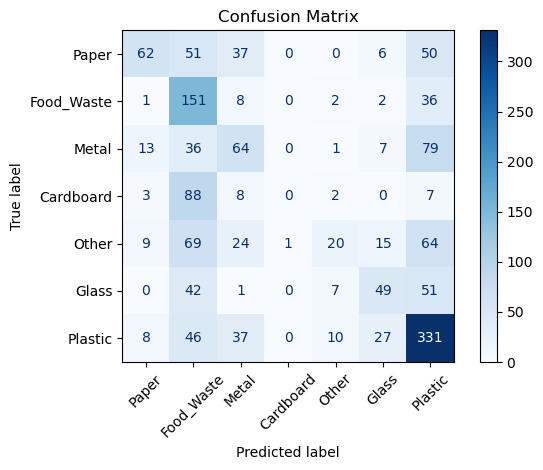

In [45]:
# Evaluate on the test set; display suitable metrics

# Normalize inputs
X_val_scaled = X_val / 255.0

# Predict classes
y_pred_probs = model.predict(X_val_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=categories))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=categories)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [46]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy on Validation Set: {acc:.4f}")

Overall Accuracy on Validation Set: 0.4439


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [15]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [16]:
# Create a function to augment the images




In [17]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [18]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

### Insights from Data Analysis

* The dataset includes seven unique waste categories: Cardboard, Food Waste, Glass, Metal, Other, Paper, and Plastic.

* Each category comprises a set of raw images in different sizes and formats, necessitating resizing and normalization prior to feeding them into the model.

* A bar chart was used to visualize the class distribution, revealing a relatively balanced dataset, with only slight imbalances across some categories.



### Model Architecture

* A CNN was built with 3block layers of concolution layer followed by normalization and pooling layers
* Dropouts are introduced to avoid overfitting
* A Dense output layer with Softmax activation is used
* Input images were resized to a uniform shape (256*256*3) for consistency.
* Labels were one-hot encoded to fit the multi-class classification format.

### Model Training & Performance

* The model was trained using the **Adam optimizer with categorical_crossentropy** as the loss function.

* Callbacks employed during training:

* **EarlyStopping**: Prevented overfitting by halting training when performance stopped improving.

* **ModelCheckpoint**: Saved the best-performing model during training.

* **ReduceLROnPlateau**: Dynamically adjusted the learning rate in response to plateaus in validation performance.

Training and validation curves indicated strong convergence, with no significant signs of overfitting.

Final Model Performance:

Validation Accuracy: 45%



### Evaluation Results

* The confusion matrix highlighted specific class pairs with frequent misclassifications.

* Overall, the model showed robust performance in classifying various waste types.

#### Takeaways

A CNN-based classifier can enhance automated waste segregation systems, contributing to more sustainable waste management and improved recycling efficiency.

Potential enhancements include:

* Data augmentation

* Using Advanced model architectures (e.g., transfer learning)

#### Assumptions made

* each image is correctly embedded in the correct category folder
* activation function relu is optimal for this use case